In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 19PW10
'19PW10 '
'19PW10_ DS.mp4'
 19PW10.gdoc
 19PW10_OOPS
'19PW10 - OS 1.gdoc'
'19PW10 - OS 1 - Line chart 1.gsheet'
 19PW10.pdf
 19PW10_Resume.gdoc
 19PW10_Resume.pdf
 Address.gslides
'ALL PAGES.zip'
'Basic File and Directory Commands.docx'
 Broadcast.zip
'Cellphone Applications'
'Checklist - Shruthi.gsheet'
'CN Assignment - IPv6.gdoc'
 CN__TCP_IP_Lab_scapy_based_prgs.gdoc
 CN__TCP_IP_Lab_scapy_based_prgs.odt
'Code Review by tool - Gomathi.gdoc'
'Code walkthrough.mp4'
'CO_ GPU.mp4'
'Colab Notebooks'
'Computer Graphics Video.mp4'
 contfoot.html
'Copy of CN 1.mp4'
'Copy of CN 2.mp4'
'Copy of CN 3.mp4'
'Copy of TeleNDAletterofundertaking (1).gdoc'
'Copy of TeleNDAletterofundertaking.gdoc'
'Cover letter.gdoc'
 Datasets
'DS PACKAGE'
 ERD.drawio
'Error detection and correction.gdoc'
'Exercise-2 Solns.docx'
'final idhayathai - Gomathi Kasiviswanathan.mp3'
'final idhayathai.mp3'
'Final recording azhage - Gomathi Kasiviswanathan.mp3'
'Final recording azhage.mp3'
'

In [2]:
!cp -r '/mydrive/My Drive/Datasets' 'Datasets/'

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234561536/234545216 [==============================] - 8s 0us/step


In [7]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1952 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 92s 883ms/step - loss: 1.0642 - accuracy: 0.8417 - val_loss: 0.0465 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 49s 795ms/step - loss: 0.7162 - accuracy: 0.9155 - val_loss: 1.8061e-04 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 48s 790ms/step - loss: 0.4135 - accuracy: 0.9401 - val_loss: 0.3916 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 48s 790ms/step - loss: 0.3143 - accuracy: 0.9559 - val_loss: 0.4439 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 48s 790ms/step - loss: 0.2330 - accuracy: 0.9688 - val_loss: 4.0000e-06 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 49s 800ms/step - loss: 0.2241 - accuracy: 0.9667 - val_loss: 0.9722 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 49s 797ms/step - loss: 0.3270 - accuracy: 0.9647 - val_loss: 0.7420 - val_accuracy

In [17]:
import matplotlib.pyplot as plt

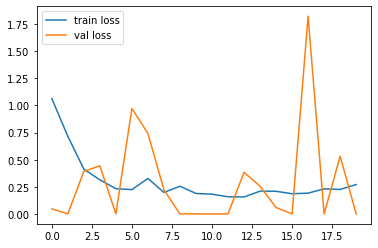

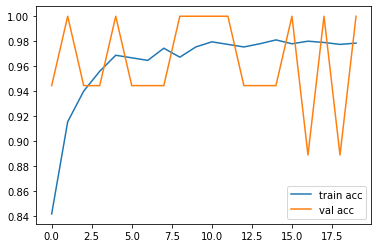

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [7.2130537e-35, 1.0000000e+00, 3.6365067e-22, 1.0021673e-26],
       [0.0000000e+00, 9.0385236e-38, 0.0000000e+00, 1.0000000e+00],
       [1.8420771e-14, 0.0000000e+00, 1.0000000e+00, 7.6380984e-32],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.8145894e-38, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.4655063e-30, 1.3106444e-12, 3.5922358e-29, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.0974743e-33, 2.1702527e-18, 1.4152504e-35],
       [9.3051066e-24, 7.5047279e-23, 2.7773035e-15, 1.0000000e+00],
       [3.1710393e-22, 2.8301028e-14, 1.1655330e-02, 9.8834467e-01],
       [0.0000000e+00, 3.8457672e-38, 1.2338045e-29, 1.0000000e+00],
       [2.3719363e-11, 0.0000000e+00, 1.0000000e+00, 2.1352742e-29],
       [1.0000000e+00, 0.0000000e+

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 1, 3, 2, 1, 2, 2, 3, 1, 0, 3, 3, 3, 2, 0, 1, 0, 2])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet152V2.h5')

In [38]:
img=image.load_img('/content/Datasets/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))

In [39]:
x=image.img_to_array(img)
x

array([[[213., 180., 135.],
        [212., 179., 134.],
        [222., 190., 141.],
        ...,
        [154., 192.,  89.],
        [220., 243., 155.],
        [229., 250., 171.]],

       [[228., 195., 150.],
        [229., 196., 151.],
        [220., 187., 142.],
        ...,
        [190., 225., 123.],
        [227., 249., 167.],
        [230., 251., 172.]],

       [[217., 184., 139.],
        [221., 189., 140.],
        [215., 182., 137.],
        ...,
        [172., 210.,  99.],
        [230., 251., 172.],
        [229., 250., 171.]],

       ...,

       [[ 82., 151.,  62.],
        [ 86., 154.,  69.],
        [ 87., 155.,  70.],
        ...,
        [ 72.,  65.,  47.],
        [ 79.,  72.,  54.],
        [ 79.,  73.,  51.]],

       [[ 81., 151.,  65.],
        [ 79., 147.,  62.],
        [ 80., 148.,  63.],
        ...,
        [ 79.,  73.,  51.],
        [ 77.,  71.,  49.],
        [ 70.,  64.,  42.]],

       [[ 90., 154.,  70.],
        [103., 171.,  86.],
        [ 91., 1

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[9.249538e-01, 3.836454e-11, 8.826778e-07, 7.504525e-02]],
      dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([0])

In [45]:
if a==0:
    a="The leaf is diseased cotton leaf"
elif a==1:
    a="The leaf is diseased cotton plant"
elif a==2:
    a="The leaf is fresh cotton leaf"
else:
    a="The leaf is fresh cotton plant"
a

'The leaf is diseased cotton leaf'